# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results )

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
column_mice_id = len(mouse_metadata['Mouse ID'])
print(column_mice_id)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


# Get the duplicate mice by ID number
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

# Print the duplicate mice IDs
print(duplicate_mice_ids)

['g989']


In [4]:
combined_df.loc[combined_df['Mouse ID']== 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
clean_df = combined_df.loc[combined_df['Mouse ID']!= 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_id = len(clean_df['Mouse ID'].unique())
clean_mice_id

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Find out how many different drugs
drug_count = len(combined_df['Drug Regimen'].unique())

# cap_mean = combined_df[]
print(drug_count)




10


In [8]:
#Find the ten names of the drugs(i should have ten different drugs)
unique_names = combined_df['Drug Regimen'].unique()
unique_names


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [9]:
#Group each drug 
grouped_df = combined_df.groupby('Drug Regimen')
print(grouped_df)

## Summary Statistics

In [10]:
summary_df = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


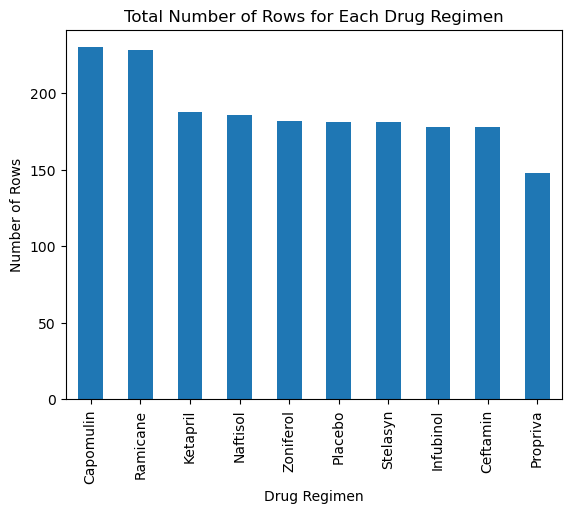

In [12]:
#using pandas
mouse_count = clean_df['Drug Regimen'].value_counts()
mouse_count.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=90)
plt.show()

## Bar and Pie Charts

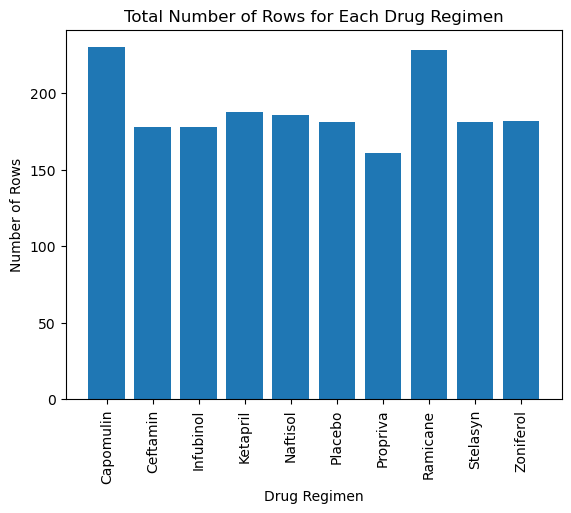

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_df = combined_df.groupby('Drug Regimen').count()['Mouse ID']
plt.bar(grouped_df.index, grouped_df.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=90)
plt.show()

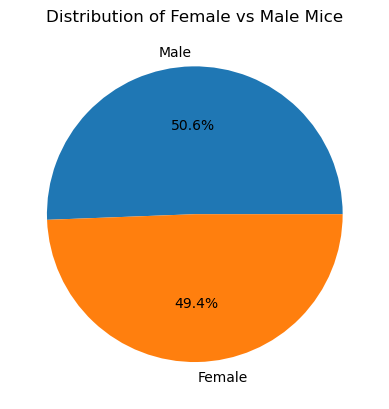

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = combined_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')

# Customize the plot
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')

# Show the plot
plt.show()

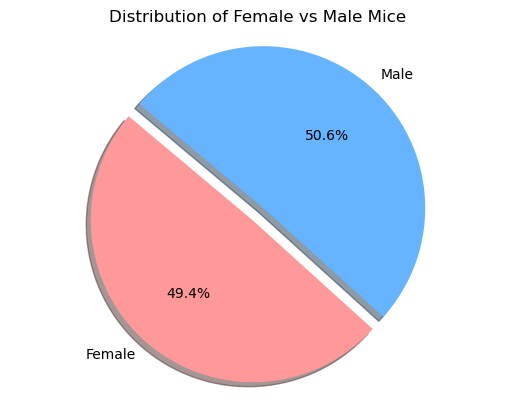

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Data preparation
labels = ['Female', 'Male']
sizes = [49.4, 50.6]  # Example counts of female and male mice
colors = ['#ff9999','#66b3ff']  # Colors for female and male
explode = (0.1, 0)  # Explode the first slice (Female)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()





## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

greatest_timepoint= greatest_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df= greatest_timepoint.merge(clean_df, on = ['Mouse ID', 'Timepoint'],how = 'left')
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

   
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
# df = grouped_df['Tumor Volume (mm3)']

# for index, row in df.iterrows():
#     tumor_vol_data.append(row[Ramicane])
#     print(tumor_vol_data)
for drug in treatments:
    final_vol= merge_df.loc[merge_df['Drug Regimen']== drug, 'Tumor Volume (mm3)']
    tumor_vol_data.append(final_vol)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_vol.quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(f'{drug}:{outliers}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:Series([], Name: Tumor Volume (mm3), dtype: float64)


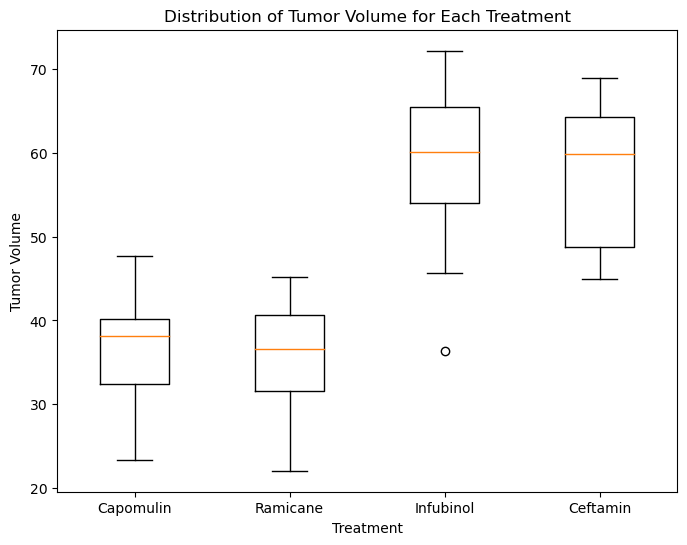

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


plt.figure(figsize=(8, 6))
# df.boxplot(column='Tumor Volume', by='Treatment')
plt.boxplot(tumor_vol_data,labels = treatments)
plt.title('Distribution of Tumor Volume for Each Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

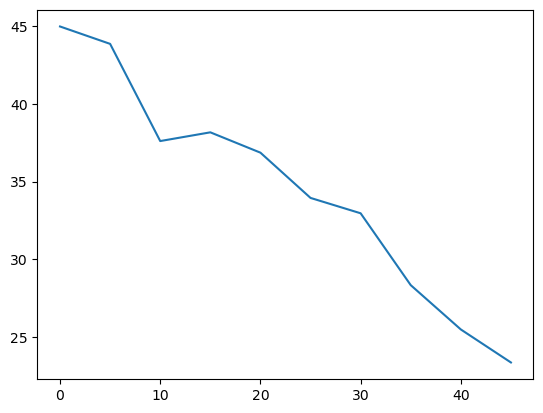

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_data = clean_df[clean_df['Drug Regimen']== 'Capomulin']
mouse_data= cap_data[cap_data['Mouse ID']== 's185']
mouse_data
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])


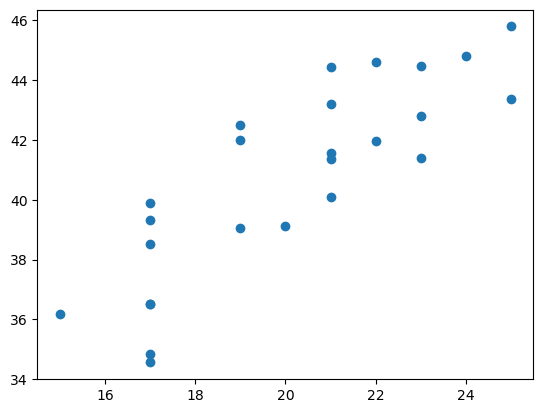

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_ave = cap_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(cap_ave['Weight (g)'], cap_ave['Tumor Volume (mm3)'])

## Correlation and Regression

The r-squared is: 0.7088568047708723


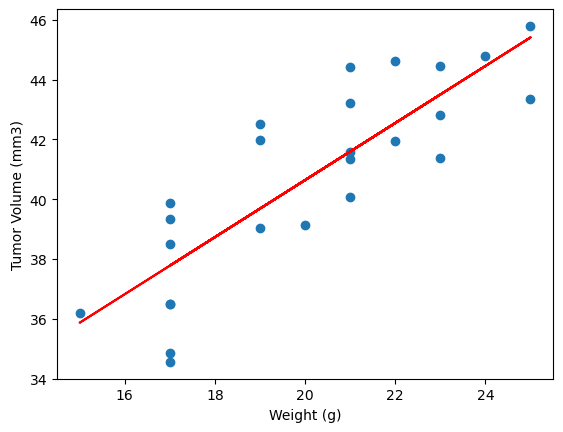

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = cap_ave['Weight (g)']
y_values = cap_ave['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()